In [1]:
import os
experiment_name = "example"
if not os.path.exists("./results/" + experiment_name + "/"):
    os.makedirs("./results/" + experiment_name + "/")

import pandas as pd
data = pd.read_csv("./Chapter_19_data.csv")

#data.loc[0:5]
#data.columns.values

shape = data.shape
print("")
print("Number of features=", shape[1])
print("Number of participants =", shape[0])

y = data["label"]
X = data.iloc[:,4:]


Number of features= 173
Number of participants = 740


In [2]:
print("")
print("Total N:", len(y))
print("N features:", len(X.columns))
print("N SZ:", len(y[y==0]))
print("N HC:", len(y[y==1]))
print("")


Total N: 740
N features: 169
N SZ: 368
N HC: 372



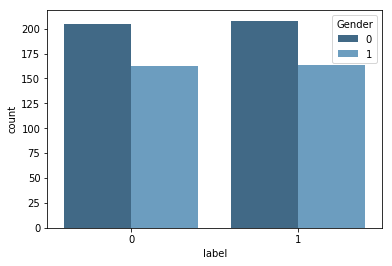

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

gender = data["Gender"]
ax = sns.countplot(x=y, hue=gender, palette="Blues_d")
plt.show()

In [7]:
mean = (data.groupby("label")["Age"].mean()).round(1)
sd = (data.groupby("label")["Age"].std()).round(1)

print("")
print("Mean age for HC:", mean[0],"±",sd[0])
print("Mean age for SZ:", mean[1],"±",sd[1])


Mean age for HC: 27.8 ± 7.6
Mean age for SZ: 27.6 ± 7.9


In [8]:
def detect_nan(dataset):
    nan_total = dataset.isnull().sum().sum() 
    if nan_total > 0:
        for column in dataset:          
            #Find Ids with nan - THIS IS PROBABLY OVERLY COMPLICATED (all I want here is to get the Ids of where the nans are so I can print them later on)
            nan = dataset[column].isnull()
            dataset["nan"] = nan 
            ids = []
            for i in dataset["nan"]:
                if i == True:
                    id_nan = dataset.loc[dataset["nan"] == True, 'ID']
                    ids.append(id_nan)               
            #Calculate total number of nan for each feature and Id
            nan_sum = nan.sum()          
            if nan_sum > 0:
                print("Found", nan_sum, "missing value(s) for", column, "for Id(s):", *ids[0])             
        #dataset = dataset.drop(columns=["nan"])
    else:
        print("There are no missing data in this dataset!")
        print("")
detect_nan(data)

There are no missing data in this dataset!




k-fold:  1
N training set: 665
N test set: 75



/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


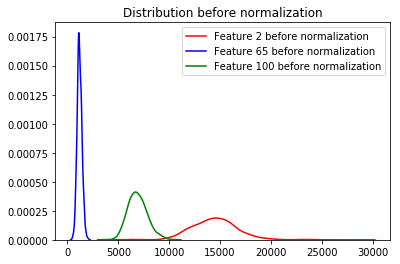

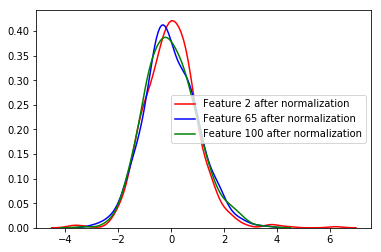


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Best: 0.651478 using {'C': 0.02}
0.586956 (0.087405) with: {'C': 2e-06}
0.591580 (0.082577) with: {'C': 2e-05}
0.594652 (0.076490) with: {'C': 0.0002}
0.635070 (0.089754) with: {'C': 0.002}
0.651478 (0.104129) with: {'C': 0.02}
0.639313 (0.090081) with: {'C': 0.2}
0.625779 (0.087406) with: {'C': 2.0}
0.619762 (0.095640) with: {'C': 20.0}
0.630271 (0.079635) with: {'C': 200.0}
0.599921 (0.095359) with: {'C': 2000.0}
Confusion matrix
[[30  7]
 [ 9 29]]

Balanced acc: 0.7870 
Sensitivity: 0.7632 
Specificity: 0.8108 
Error Rate: 0.2133 

k-fold:  2
N training set: 665
N test set: 75



/Users/sandra/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


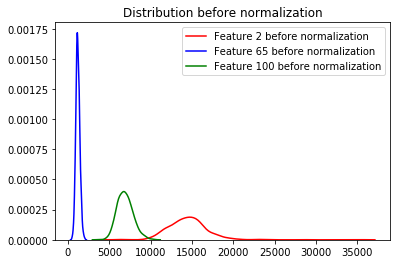

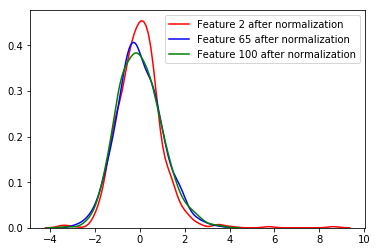


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Best: 0.688790 using {'C': 200.0}
0.592997 (0.103384) with: {'C': 2e-06}
0.594657 (0.086310) with: {'C': 2e-05}
0.611400 (0.071588) with: {'C': 0.0002}
0.617276 (0.068312) with: {'C': 0.002}
0.680214 (0.060854) with: {'C': 0.02}
0.663581 (0.066414) with: {'C': 0.2}
0.686072 (0.063874) with: {'C': 2.0}
0.679944 (0.072191) with: {'C': 20.0}
0.688790 (0.063948) with: {'C': 200.0}
0.679811 (0.055827) with: {'C': 2000.0}
Confusion matrix
[[26 11]
 [10 28]]

Balanced acc: 0.7198 
Sensitivity: 0.7368 
Specificity: 0.7027 
Error Rate: 0.2800 

k-fold:  3
N training set: 666
N test set: 74



/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


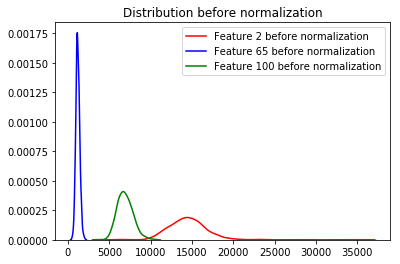

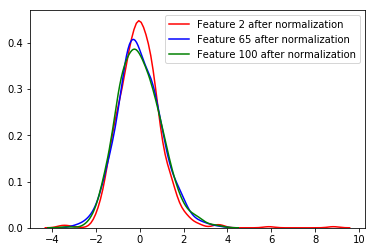


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Best: 0.651749 using {'C': 0.02}
0.576897 (0.085870) with: {'C': 2e-06}
0.596530 (0.071363) with: {'C': 2e-05}
0.599665 (0.081099) with: {'C': 0.0002}
0.617390 (0.086182) with: {'C': 0.002}
0.651749 (0.085180) with: {'C': 0.02}
0.638190 (0.082442) with: {'C': 0.2}
0.632095 (0.083119) with: {'C': 2.0}
0.618828 (0.090102) with: {'C': 20.0}
0.622815 (0.095048) with: {'C': 200.0}
0.615757 (0.074909) with: {'C': 2000.0}
Confusion matrix
[[24 13]
 [ 8 29]]

Balanced acc: 0.7162 
Sensitivity: 0.7838 
Specificity: 0.6486 
Error Rate: 0.2838 

k-fold:  4
N training set: 666
N test set: 74



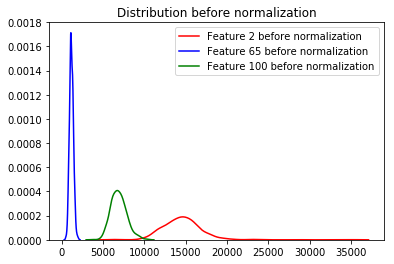

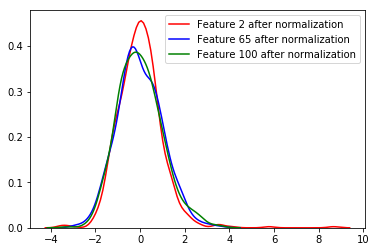


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Best: 0.675799 using {'C': 0.02}
0.584407 (0.098790) with: {'C': 2e-06}
0.593506 (0.089738) with: {'C': 2e-05}
0.607196 (0.082230) with: {'C': 0.0002}
0.652131 (0.075146) with: {'C': 0.002}
0.675799 (0.069312) with: {'C': 0.02}
0.660491 (0.071094) with: {'C': 0.2}
0.666477 (0.061290) with: {'C': 2.0}
0.654372 (0.077114) with: {'C': 20.0}
0.643931 (0.059485) with: {'C': 200.0}
0.652893 (0.077288) with: {'C': 2000.0}
Confusion matrix
[[26 11]
 [ 9 28]]

Balanced acc: 0.7297 
Sensitivity: 0.7568 
Specificity: 0.7027 
Error Rate: 0.2703 

k-fold:  5
N training set: 666
N test set: 74



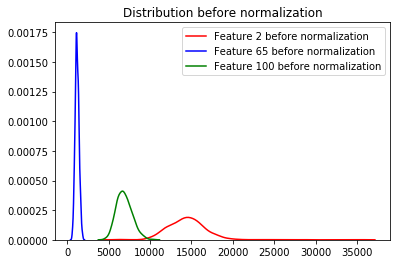

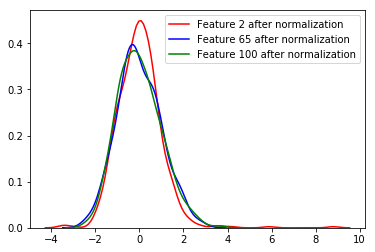


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Best: 0.675690 using {'C': 20.0}
0.587455 (0.089644) with: {'C': 2e-06}
0.595007 (0.080263) with: {'C': 2e-05}
0.616116 (0.094907) with: {'C': 0.0002}
0.653409 (0.094650) with: {'C': 0.002}
0.674388 (0.094251) with: {'C': 0.02}
0.668182 (0.086787) with: {'C': 0.2}
0.663498 (0.079793) with: {'C': 2.0}
0.675690 (0.100436) with: {'C': 20.0}
0.651461 (0.105176) with: {'C': 200.0}
0.654534 (0.097692) with: {'C': 2000.0}
Confusion matrix
[[29  8]
 [16 21]]

Balanced acc: 0.6757 
Sensitivity: 0.5676 
Specificity: 0.7838 
Error Rate: 0.3243 

k-fold:  6
N training set: 666
N test set: 74



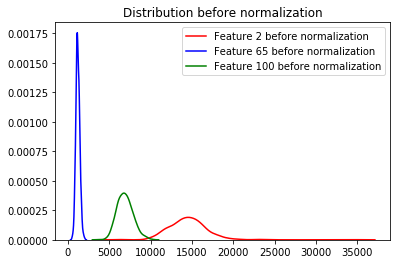

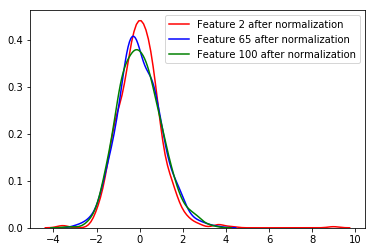


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Best: 0.662172 using {'C': 0.02}
0.584449 (0.114161) with: {'C': 2e-06}
0.585996 (0.097306) with: {'C': 2e-05}
0.611589 (0.080336) with: {'C': 0.0002}
0.648815 (0.071762) with: {'C': 0.002}
0.662172 (0.072241) with: {'C': 0.02}
0.636645 (0.065905) with: {'C': 0.2}
0.642630 (0.062525) with: {'C': 2.0}
0.624498 (0.063830) with: {'C': 20.0}
0.660514 (0.069424) with: {'C': 200.0}
0.636602 (0.084908) with: {'C': 2000.0}
Confusion matrix
[[26 11]
 [10 27]]

Balanced acc: 0.7162 
Sensitivity: 0.7297 
Specificity: 0.7027 
Error Rate: 0.2838 

k-fold:  7
N training set: 666
N test set: 74



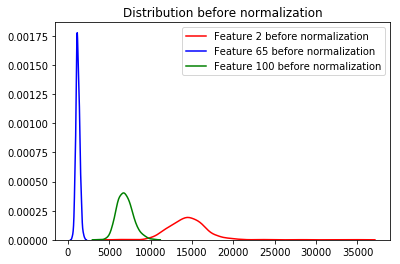

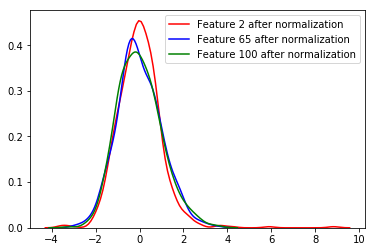


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Best: 0.668226 using {'C': 2000.0}
0.573804 (0.072923) with: {'C': 2e-06}
0.578399 (0.070642) with: {'C': 2e-05}
0.582856 (0.077278) with: {'C': 0.0002}
0.603853 (0.085278) with: {'C': 0.002}
0.641373 (0.067910) with: {'C': 0.02}
0.657779 (0.054162) with: {'C': 0.2}
0.660827 (0.059624) with: {'C': 2.0}
0.620215 (0.090056) with: {'C': 20.0}
0.653385 (0.066849) with: {'C': 200.0}
0.668226 (0.070722) with: {'C': 2000.0}
Confusion matrix
[[29  8]
 [10 27]]

Balanced acc: 0.7568 
Sensitivity: 0.7297 
Specificity: 0.7838 
Error Rate: 0.2432 

k-fold:  8
N training set: 666
N test set: 74



/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


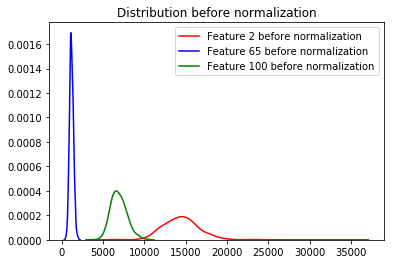

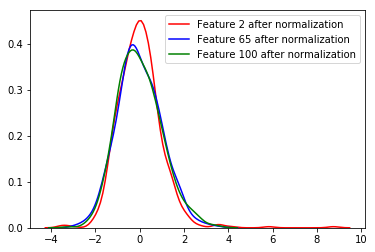


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Best: 0.690926 using {'C': 0.02}
0.585839 (0.087309) with: {'C': 2e-06}
0.595005 (0.076201) with: {'C': 2e-05}
0.604078 (0.098603) with: {'C': 0.0002}
0.640161 (0.091835) with: {'C': 0.002}
0.690926 (0.082424) with: {'C': 0.02}
0.674208 (0.080760) with: {'C': 0.2}
0.672640 (0.081342) with: {'C': 2.0}
0.651619 (0.077455) with: {'C': 20.0}
0.667909 (0.090392) with: {'C': 200.0}
0.656100 (0.083679) with: {'C': 2000.0}
Confusion matrix
[[25 12]
 [ 9 28]]

Balanced acc: 0.7162 
Sensitivity: 0.7568 
Specificity: 0.6757 
Error Rate: 0.2838 

k-fold:  9
N training set: 667
N test set: 73



/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.1s finished
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a no

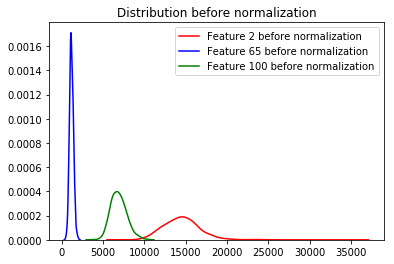

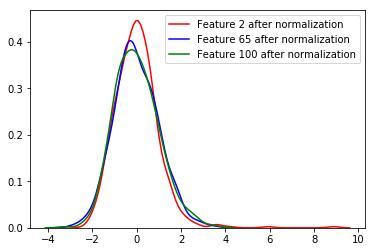


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Best: 0.650714 using {'C': 0.2}
0.572777 (0.089022) with: {'C': 2e-06}
0.575774 (0.070237) with: {'C': 2e-05}
0.584788 (0.084461) with: {'C': 0.0002}
0.623657 (0.081742) with: {'C': 0.002}
0.644672 (0.075077) with: {'C': 0.02}
0.650714 (0.074350) with: {'C': 0.2}
0.644515 (0.089828) with: {'C': 2.0}
0.635521 (0.068798) with: {'C': 20.0}
0.597763 (0.099046) with: {'C': 200.0}
0.638315 (0.087892) with: {'C': 2000.0}
Confusion matrix
[[27  9]
 [11 26]]

Balanced acc: 0.7264 
Sensitivity: 0.7027 
Specificity: 0.7500 
Error Rate: 0.2740 

k-fold:  10
N training set: 667
N test set: 73



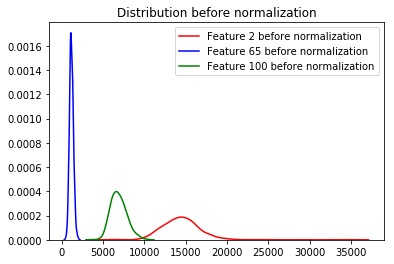

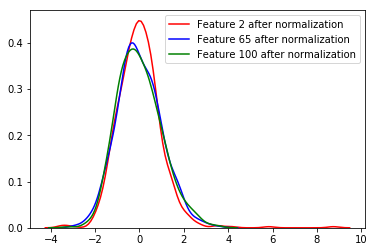


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/bas

/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Best: 0.661029 using {'C': 0.02}
0.572844 (0.094714) with: {'C': 2e-06}
0.587836 (0.086161) with: {'C': 2e-05}
0.595239 (0.086015) with: {'C': 0.0002}
0.623657 (0.078905) with: {'C': 0.002}
0.661029 (0.098758) with: {'C': 0.02}
0.654944 (0.075313) with: {'C': 0.2}
0.645926 (0.070559) with: {'C': 2.0}
0.647649 (0.092084) with: {'C': 20.0}
0.651945 (0.073568) with: {'C': 200.0}
0.645992 (0.076531) with: {'C': 2000.0}
Confusion matrix
[[32  4]
 [10 27]]

Balanced acc: 0.8093 
Sensitivity: 0.7297 
Specificity: 0.8889 
Error Rate: 0.1918 

Cross-validation Balanced acc: 0.7353 +- 0.0369
Cross-validation Sensitivity: 0.7257 +- 0.0569
Cross-validation Specificity: 0.7450 +- 0.0689
Cross-validation Error Rate: 0.2648 +- 0.0366



/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.4s finished
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [10]:
import numpy as np
X = np.asarray(X.values, dtype='float32')
y = np.asarray(y.values, dtype='float32')

from sklearn.model_selection import StratifiedKFold
n_folds = 10
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)

cv_test_bac = np.zeros((n_folds,))
cv_test_sens = np.zeros((n_folds,))
cv_test_spec = np.zeros((n_folds,))
cv_error_rate = np.zeros((n_folds,))
coefficients = []

for i_fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print("")
    print("k-fold: ", i_fold + 1)
    print("N training set:", len(y_train))
    print("N test set:", len(y_test))
    print("")

    from sklearn.preprocessing import Imputer
    imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 1)
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(X_train)
    X_train_n = scaler.transform(X_train)
    X_test_n = scaler.transform(X_test)    

    feature_2_before, feature_65_before, feature_100_before  = X_train[:,2], X_train[:,65], X_train[:,100]
    feature_2_after, feature_65_after, feature_100_after = X_train_n[:,2], X_train_n[:,65], X_train_n[:,100]

    p1_before=sns.kdeplot(feature_2_before, color="r", label=("Feature 2 before normalization"))
    p1_before=sns.kdeplot(feature_65_before, color="b", label=("Feature 65 before normalization"))
    p1_before=sns.kdeplot(feature_100_before, color="g", label=("Feature 100 before normalization"))
    p1_before.set_title('Distribution before normalization')
    plt.show()
    
    p1_after=sns.kdeplot(feature_2_after, color="r", label=("Feature 2 after normalization"))
    p1_after=sns.kdeplot(feature_65_after, color="b", label=("Feature 65 after normalization"))
    p1_after=sns.kdeplot(feature_100_after, color="g", label=("Feature 100 after normalization"))
    p1_before.set_title('Distribution after normalization')
    plt.show()
    print("")
    
    from sklearn.metrics import make_scorer
    from sklearn.metrics import confusion_matrix
    def balanced_accuracy_score(actual, prediction):
        cm = confusion_matrix(actual, prediction)
        bac = np.sum(np.true_divide(np.diagonal(cm), np.sum(cm, axis=1))) / cm.shape[1]
        return bac
    grid_scorer = make_scorer(balanced_accuracy_score, greater_is_better=True)

    from sklearn.svm import LinearSVC
    clf = LinearSVC()
    
    from sklearn.model_selection import GridSearchCV
    param_grid = [
        {'C': [2e-6, 2e-5, 2e-4, 2e-3, 2e-2, 2e-1, 2e0, 2e1, 2e2, 2e3]},
    ]
    internal_cv = StratifiedKFold(n_splits=10)
    grid_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=internal_cv, scoring=grid_scorer, verbose=1)

    grid_result = grid_clf.fit(X_train_n, y_train)
    
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']

    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
              
    clf2 = LinearSVC(C=grid_result.best_params_["C"])
    clf2.fit(X_train_n, y_train)
    y_predicted = clf2.predict(X_test_n)

    print("Confusion matrix")
    cm = confusion_matrix(y_test, y_predicted)
    print(cm)
    print("")

    test_bac = np.sum(np.true_divide(np.diagonal(cm), np.sum(cm, axis=1))) / cm.shape[1]
    test_sens = np.true_divide(cm[1, 1], np.sum(cm[1, :]))
    test_spec = np.true_divide(cm[0, 0], np.sum(cm[0, :]))
    error_rate = np.true_divide(cm[0, 1] + cm[1, 0], np.sum(np.sum(cm)))
    
    print("Balanced acc: %.4f " % (test_bac))
    print("Sensitivity: %.4f " % (test_sens))
    print("Specificity: %.4f " % (test_spec))
    print("Error Rate: %.4f " % (error_rate))
    
    cv_test_bac[i_fold - 1] = test_bac
    cv_test_sens[i_fold - 1] = test_sens
    cv_test_spec[i_fold - 1] = test_spec
    cv_error_rate[i_fold - 1] = error_rate

    coefficients_fold = clf2.coef_
    coefficients.append(coefficients_fold)

    import csv
    import pickle
    
    if i_fold == 0:
        file_predictions = open("./results/" + experiment_name + "/error_analysis.csv", 'w')
        wr = csv.writer(file_predictions)
        wr.writerow(['INDEX', 'TRUE LABEL', 'PREDICTED'])
    else:
        file_predictions = open("./results/" + experiment_name + "/error_analysis.csv", 'a')
        wr = csv.writer(file_predictions)
    for j, fname in enumerate(test_index):
        wr.writerow([(str(fname)), str(y_test[j]), str(y_predicted[j])])
    wr.writerow(['-', '-', '-'])
    file_predictions.close()
    
    f = open("./results/"+experiment_name+"/clf_"+str(i_fold)+".pkl", 'wb')
    pickle.dump(clf, f)
    f.close()

print("")
print("Cross-validation Balanced acc: %.4f +- %.4f" % (cv_test_bac.mean(), cv_test_bac.std()))
print("Cross-validation Sensitivity: %.4f +- %.4f" % (cv_test_sens.mean(), cv_test_sens.std()))
print("Cross-validation Specificity: %.4f +- %.4f" % (cv_test_spec.mean(), cv_test_spec.std()))
print("Cross-validation Error Rate: %.4f +- %.4f" % (cv_error_rate.mean(), cv_error_rate.std()))
print("")

# Make sure to save your main results
f = open("./results/" + experiment_name + "/final_BAC.pkl", 'wb')
pickle.dump(cv_test_bac, f)
f.close()


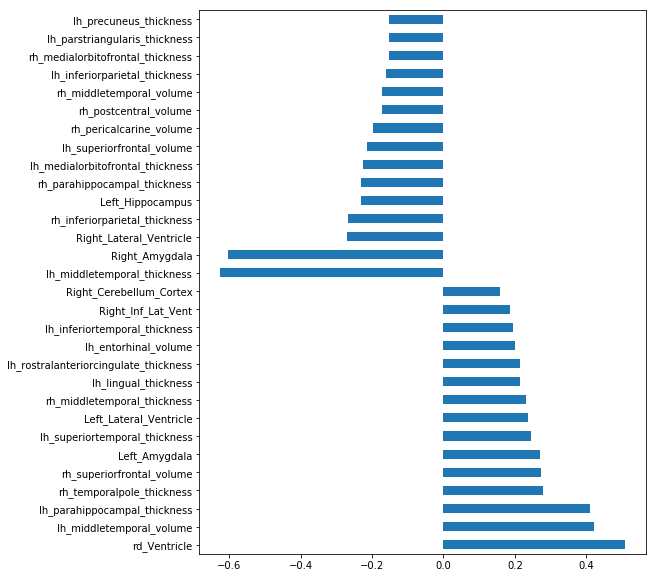

In [11]:
def plot_coefs(coeffs): #this code works but it is not very elegant??
    coeffs = np.mean((np.asarray(coeffs)), axis=0)

    feature_names = data.iloc[:,4:].columns #get feature names from original data
    coeffs = pd.DataFrame(data=coeffs, columns=feature_names)
    coeffs = coeffs.transpose()

    #get top positive and negative weights
    largest_coefs = coeffs.nlargest(n=15, columns=0) 
    smallest_coefs = coeffs.nsmallest(n=15, columns=0)
    
    coeffs = pd.concat([largest_coefs,smallest_coefs], axis=0, sort=True) #concat for plotting
    coeffs.plot(kind='barh', figsize=(8,10), legend=False) #plot weights
    
plot_coefs(coefficients)

In [12]:
models = []
for i in range(n_folds):
    print("Loading models ", i)
    f = open("./results/"+experiment_name+"/clf_"+str(i)+".pkl", 'rb')
    models.append(pickle.load(f))
    f.close()

f = open("./results/"+experiment_name+"/final_BAC.pkl", 'rb')
best_BAC = pickle.load(f)
f.close()

from sklearn.base import clone
seed=1
n_permutation = 5
permutation_test_bac = np.zeros((n_permutation,))

print("Starting permutation with ", n_permutation, " iterations")
for p in range(n_permutation):

    np.random.seed(seed + p)
    permuted_labels = np.random.permutation(y)
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

    cv_test_bac = np.zeros((n_folds,))

    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        # ---------------------------------------------------------------------------------------------
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = permuted_labels[train_index], permuted_labels[test_index]

        # ------------------------------- Normalization ------------------------------------------------
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        clf = clone(models[i])

        clf.fit(X_train, y_train)
        y_predicted = clf.predict(X_test)

        # -------------------------- Performance metrics -------------------------------------------
        cm = confusion_matrix(y_test, y_predicted)

        test_bac = np.sum(np.true_divide(np.diagonal(cm), np.sum(cm, axis=1))) / cm.shape[1]
        cv_test_bac[i - 1] = test_bac

    permutation_test_bac[p] = cv_test_bac.mean()
    print("Permutation: ", p, " BAC: ", cv_test_bac.mean())

print("")
print("BEST BAC", best_BAC.mean())
pvalue = (np.sum((permutation_test_bac>best_BAC.mean()).astype('int'))+1.)/(n_permutation+1.)
print("P-VALUE", pvalue)

#Save p-value to the designated folder
f = open("./results/"+experiment_name+"/p-value.pkl", 'wb')
pickle.dump(pvalue, f)
f.close()

Loading models  0
Loading models  1
Loading models  2
Loading models  3
Loading models  4
Loading models  5
Loading models  6
Loading models  7
Loading models  8
Loading models  9
Starting permutation with  5  iterations


/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Permutation:  0  BAC:  0.47655384789472544


/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Permutation:  1  BAC:  0.5272525619180728


/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Permutation:  2  BAC:  0.4714770310906006


/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Permutation:  3  BAC:  0.5057836634213069


/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Permutation:  4  BAC:  0.4946792877541412

BEST BAC 0.7353228228228229
P-VALUE 0.16666666666666666


/Users/sandra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
